In [1]:
#Inspecting the contents of the uploaded file
import pandas as pd

data = pd.read_csv("Mall_Customers.csv")

data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


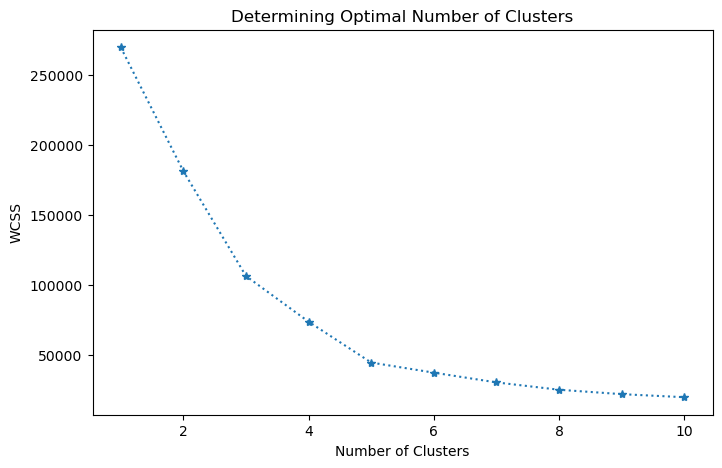

In [7]:
import os
import warnings
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Set the environment variable to avoid memory leak
os.environ["OMP_NUM_THREADS"] = "1"

# Suppress the specific warning
warnings.filterwarnings("ignore", message="KMeans is known to have a memory leak")

# Your clustering code
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='*', linestyle=':')
plt.title('Determining Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


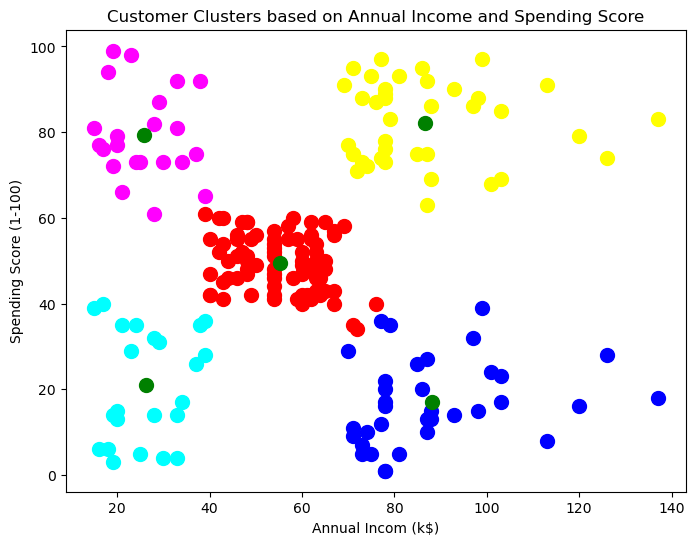

In [8]:
#applying k-means clustering for 5 clusters
kmeans = KMeans(n_clusters=5, init='k-means++', n_init=10 , random_state=42)
y_kmeans = kmeans.fit_predict(X)

#adding cluster predictions to original dataset
data['Cluster'] = y_kmeans

#visualizing the clusters
plt.figure(figsize = (8,6))
plt.scatter(X.values[y_kmeans == 0,0], X.values[y_kmeans == 0,1], s=100, c='red', label='Cluster 1')
plt.scatter(X.values[y_kmeans == 1,0], X.values[y_kmeans == 1,1], s=100, c='blue', label='Cluster 2')
plt.scatter(X.values[y_kmeans == 2,0], X.values[y_kmeans == 2,1], s=100, c='cyan', label='Cluster 3')
plt.scatter(X.values[y_kmeans == 3,0], X.values[y_kmeans == 3,1], s=100, c='magenta', label='Cluster 4')
plt.scatter(X.values[y_kmeans == 4,0], X.values[y_kmeans == 4,1], s=100, c='yellow', label='Cluster 5')

#plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:, 1], s=100, c='green', label='centroids')
plt.title('Customer Clusters based on Annual Income and Spending Score')
plt.xlabel('Annual Incom (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()